##  Image Feature Extraction and Classification 

### Importing module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

### Loading the dataset and split into training and testing

In [2]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf

# Load MNIST dataset as it is (60,000 train, 10,000 test)
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

# Function to convert TensorFlow dataset to NumPy arrays
def dataset_to_numpy(ds):
    images, labels = [], []
    for image, label in tfds.as_numpy(ds):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

X_train, Y_train = dataset_to_numpy(ds_train)  # 60,000 images
X_test, Y_test = dataset_to_numpy(ds_test)    # 10,000 images

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 60000
Testing set size: 10000


### Some images in dataset

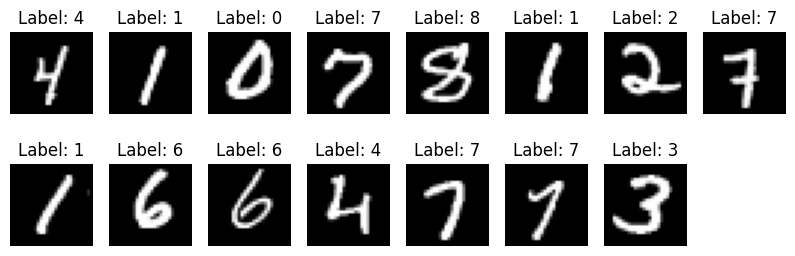

In [3]:
def show_images(images, labels, num=15):
    plt.figure(figsize=(10, 10)) 
    for i in range(num):
        plt.subplot(6, 8, i + 1) 
        plt.imshow(images[i].squeeze(), cmap='gray') 
        plt.title(f"Label: {labels[i]}")  
        plt.axis('off') 
    plt.show()

show_images(X_train, Y_train, num=15)

### Traditional feature extraction of HOG, Visulization of HOG extrated images and Time taken for feature extraction 

HOG feature extraction completed!
HOG Feature Extraction Time: 60.20 seconds


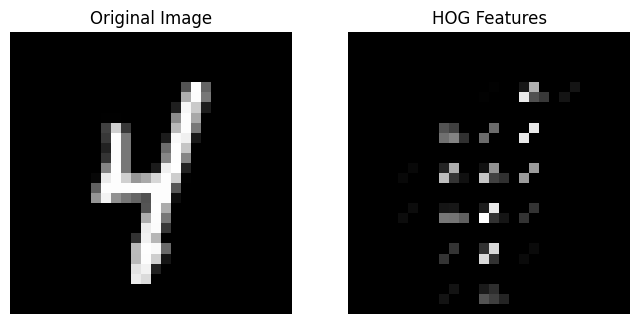

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from joblib import Parallel, delayed

start_time = time.time()

def process_image(img, visualize=False):
    img_gray = img.squeeze()  # Convert (28,28,1) → (28,28)
    if visualize:
        feature_vector, hog_image = hog(img_gray, pixels_per_cell=(4, 4), 
                                        cells_per_block=(2, 2), visualize=True)
        return feature_vector, hog_image
    else:
        feature_vector = hog(img_gray, pixels_per_cell=(4, 4), 
                             cells_per_block=(2, 2), visualize=False)
        return feature_vector
# Parallelized HOG feature extraction
def extract_hog_features_parallel(images):
    return np.array(Parallel(n_jobs=-1)(delayed(process_image)(img) for img in images))
# Extract HOG features 
X_train_hog = extract_hog_features_parallel(X_train)
X_test_hog = extract_hog_features_parallel(X_test)

end_time = time.time()

print("HOG feature extraction completed!")
print(f"HOG Feature Extraction Time: {end_time - start_time:.2f} seconds")
def visualize_hog(img):
    feature_vector, hog_image = process_image(img, visualize=True)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.axis("off")
    plt.show()
# Display HOG visualization for the first image in training set
visualize_hog(X_train[0])


### Traditional feature extraction of LBP, Visulization of LBP extrated images and Time taken for feature extraction 

LBP feature extraction completed!
LBP Feature Extraction Time: 19.72 seconds


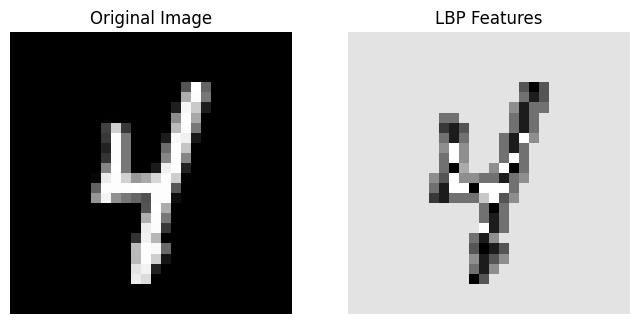

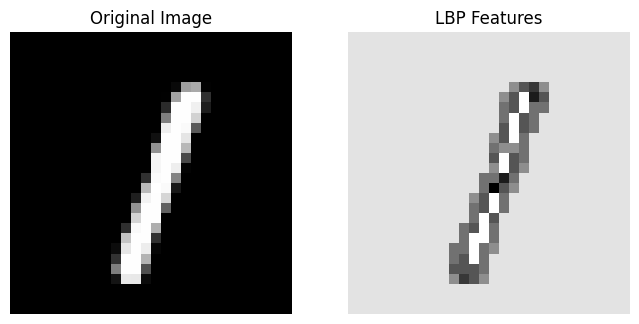

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from joblib import Parallel, delayed

start_time = time.time()

def process_image_lbp(img):
    img_gray = img.squeeze()  # Convert (28,28,1) → (28,28)
    lbp = local_binary_pattern(img_gray, P=8, R=1, method="uniform")
    return lbp.flatten() 
# Parallelized LBP feature extraction
def extract_lbp_features_parallel(images):
    return np.array(Parallel(n_jobs=-1)(delayed(process_image_lbp)(img) for img in images))
X_train_lbp = extract_lbp_features_parallel(X_train)
X_test_lbp = extract_lbp_features_parallel(X_test)
print("LBP feature extraction completed!")

end_time = time.time()

print(f"LBP Feature Extraction Time: {end_time - start_time:.2f} seconds")
def visualize_lbp(img):
    img_gray = img.squeeze()
    lbp_image = local_binary_pattern(img_gray, P=8, R=1, method="uniform")
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title("LBP Features")
    plt.axis("off")
    plt.show()
visualize_lbp(X_train[0])
visualize_lbp(X_train[1])

### Traditional feature extraction of Edge Detection, Visulization of Edge Detection extrated images and Time taken for feature extraction 

Edge Detection feature extraction completed!
Edge Detection Feature Extraction Time: 27.21 seconds


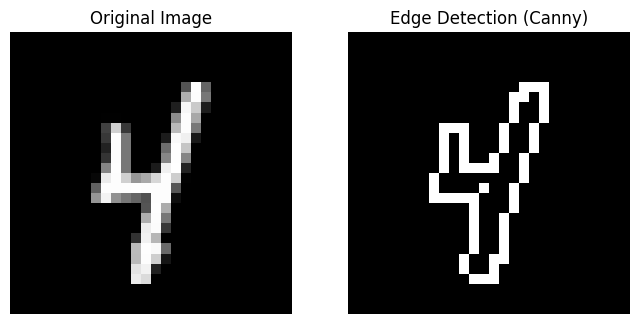

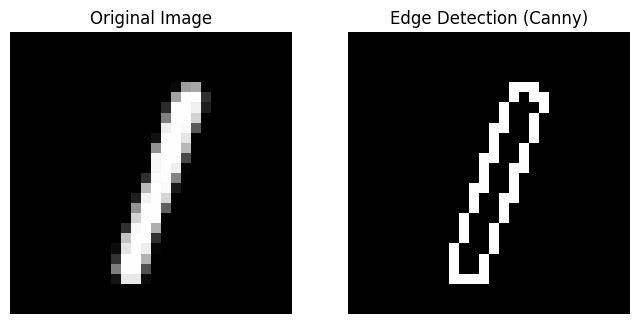

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from joblib import Parallel, delayed

start_time = time.time()

def process_image_edge(img):
    img_gray = img.squeeze()  # Convert (28,28,1) → (28,28)
    edges = canny(img_gray) 
    return edges.flatten() 
def extract_edge_features_parallel(images):
    return np.array(Parallel(n_jobs=-1)(delayed(process_image_edge)(img) for img in images))
X_train_edge = extract_edge_features_parallel(X_train)
X_test_edge = extract_edge_features_parallel(X_test)
print("Edge Detection feature extraction completed!")

end_time = time.time()

print(f"Edge Detection Feature Extraction Time: {end_time - start_time:.2f} seconds")
def visualize_edges(img):
    img_gray = img.squeeze()
    edges = canny(img_gray)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection (Canny)")
    plt.axis("off")
    plt.show()
visualize_edges(X_train[0])
visualize_edges(X_train[1])

### Traditional feature extraction of Deep learning-based feature extraction (VGG) , Visulization of VGG extrated images and Time taken for feature extraction

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.image import resize  # For resizing images

start_time = time.time()

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))  # Use (32,32,3)
model = Model(inputs=base_model.input, outputs=base_model.output)
def extract_deep_features(model, images, batch_size=128):
    images_resized = np.array([resize(img, (32, 32)).numpy() for img in images])
    images_rgb = np.repeat(images_resized, 3, axis=-1)  # Convert grayscale to RGB
    images_rgb = preprocess_input(images_rgb)  # Normalize as per VGG16 requirements
    features = model.predict(images_rgb, batch_size=batch_size, verbose=1)
    return features.reshape(features.shape[0], -1) 
X_train_deep = extract_deep_features(model, X_train)
X_test_deep = extract_deep_features(model, X_test)
print("Deep Learning feature extraction (VGG16) completed!")

end_time = time.time()

print(f"Deep Learning Feature Extraction Time: {end_time - start_time:.2f} seconds")

469/469 ━━━━━━━━━━━━━━━━━━━━ 721s 2s/step 
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step    
Deep Learning feature extraction (VGG16) completed!
Deep Learning Feature Extraction Time: 858.24 seconds


### Standardization (Rescaling the extracted  feature to have mean 0 and standard deviation 1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler_hog = StandardScaler()
X_train_hog_scaled = scaler_hog.fit_transform(X_train_hog)
X_test_hog_scaled = scaler_hog.transform(X_test_hog)

scaler_lbp = StandardScaler()
X_train_lbp_scaled = scaler_lbp.fit_transform(X_train_lbp)
X_test_lbp_scaled = scaler_lbp.transform(X_test_lbp)

scaler_edge = StandardScaler()
X_train_edge_scaled = scaler_edge.fit_transform(X_train_edge)
X_test_edge_scaled = scaler_edge.transform(X_test_edge)

scaler_deep = StandardScaler()
X_train_deep_scaled = scaler_deep.fit_transform(X_train_deep)
X_test_deep_scaled = scaler_deep.transform(X_test_deep)

### Splitting the data into training and testing sets for all extracted features

In [9]:
from sklearn.model_selection import train_test_split

# Splitting for HOG features
X_train_hog_final, X_val_hog, Y_train_final, Y_val = train_test_split(X_train_hog_scaled, Y_train, test_size=0.2, random_state=42)
# Splitting for LBP features
X_train_lbp_final, X_val_lbp, Y_train_lbp, Y_val_lbp = train_test_split(X_train_lbp_scaled, Y_train, test_size=0.2, random_state=42)
# Splitting for Edge features
X_train_edge_final, X_val_edge, Y_train_edge, Y_val_edge = train_test_split(X_train_edge_scaled, Y_train, test_size=0.2, random_state=42)
# Splitting for Deep Learning features
X_train_deep_final, X_val_deep, Y_train_deep, Y_val_deep = train_test_split(X_train_deep_scaled, Y_train, test_size=0.2, random_state=42)


### Importing methods and module

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### Function to find accuracy, precision, recall, F1-score for the models

In [11]:
def evaluate_model(model, X_val, Y_val, feature_name):
    Y_pred = model.predict(X_val)
    
    print(f"--- {feature_name} Feature Set ---")
    print(f"Accuracy: {accuracy_score(Y_val, Y_pred):.4f}")
    print(f"Precision: {precision_score(Y_val, Y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(Y_val, Y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(Y_val, Y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(Y_val, Y_pred))
    print("-" * 50)

### Training of data to the model on the extracted features and Time taken for model training

In [12]:
# Train Logistic Regression on HOG features
start_time = time.time()
log_reg_hog = LogisticRegression(max_iter=1000)
log_reg_hog.fit(X_train_hog_final, Y_train_final)
end_time = time.time()
print(f"Logistic Regression Training Time (HOG): {end_time - start_time:.2f} seconds")

# Train KNN on LBP features
start_time = time.time()
knn_lbp = KNeighborsClassifier(n_neighbors=5)
knn_lbp.fit(X_train_lbp_final, Y_train_lbp)
end_time = time.time()
print(f"KNN Training Time (LBP): {end_time - start_time:.2f} seconds")

# Train Decision Tree on Edge Detection features
start_time = time.time()
dt_edge = DecisionTreeClassifier()
dt_edge.fit(X_train_edge_final, Y_train_edge)
end_time = time.time()
print(f"Decision Tree Training Time (Edge): {end_time - start_time:.2f} seconds")

# Train Random Forest on Deep Learning features
start_time = time.time()
rf_deep = RandomForestClassifier(n_estimators=100, random_state=42)
rf_deep.fit(X_train_deep_final, Y_train_deep)
end_time = time.time()
print(f"Random Forest Training Time (Deep Learning): {end_time - start_time:.2f} seconds")

Logistic Regression Training Time (HOG): 13.08 seconds
KNN Training Time (LBP): 0.14 seconds
Decision Tree Training Time (Edge): 31.44 seconds
Random Forest Training Time (Deep Learning): 116.07 seconds


### Calling function to find accuracy, precision, recall, F1-score

In [13]:
evaluate_model(log_reg_hog, X_val_hog, Y_val, "HOG")
evaluate_model(knn_lbp, X_val_lbp, Y_val_lbp, "LBP")
evaluate_model(dt_edge, X_val_edge, Y_val_edge, "Edge")
evaluate_model(rf_deep, X_val_deep, Y_val_deep, "Deep Learning")

--- HOG Feature Set ---
Accuracy: 0.9723
Precision: 0.9724
Recall: 0.9723
F1-score: 0.9723

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.98      0.98      0.98      1314
           2       0.98      0.97      0.98      1181
           3       0.97      0.96      0.97      1249
           4       0.97      0.97      0.97      1139
           5       0.97      0.97      0.97      1097
           6       0.98      0.98      0.98      1210
           7       0.97      0.97      0.97      1276
           8       0.95      0.95      0.95      1120
           9       0.96      0.97      0.96      1214

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

--------------------------------------------------
--- LBP Feature Set ---
Accuracy: 0.8326
Precision: 0.8470
Recall: 0.8326


###  Robustness (Model's ability to maintain accurate predictions after transformations such as noise addition, rotation, or blurring also)

In [14]:
import numpy as np
from scipy.ndimage import rotate
from scipy.ndimage import gaussian_filter

def add_noise(img, noise_level=0.3):
    noise = np.random.normal(loc=0, scale=noise_level, size=img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Keep values in [0,1]
    return noisy_img
def rotate_image(img, angle=15):
    return rotate(img, angle, reshape=False)
def blur_image(img, sigma=1.0):
    return gaussian_filter(img, sigma=sigma)

X_test_noisy_images = np.array([add_noise(img) for img in X_test])
X_test_rotated_images = np.array([rotate_image(img) for img in X_test])
X_test_blurred_images = np.array([blur_image(img) for img in X_test])

### Extracting feature for noise, rotated and blurred images

In [15]:
# HOG 
start_time = time.time()
X_test_noisy_hog = extract_hog_features_parallel(X_test_noisy_images)
X_test_rotated_hog = extract_hog_features_parallel(X_test_rotated_images)
X_test_blurred_hog = extract_hog_features_parallel(X_test_blurred_images)
end_time = time.time()
print(f"HOG Feature Extraction Time for noise, rotation and blur: {end_time - start_time:.2f} seconds")



# LBP
start_time = time.time()
X_test_noisy_lbp = extract_lbp_features_parallel(X_test_noisy_images)
X_test_rotated_lbp = extract_lbp_features_parallel(X_test_rotated_images)
X_test_blurred_lbp = extract_lbp_features_parallel(X_test_blurred_images)
end_time = time.time()
print(f"LBP Feature Extraction Time for noise, rotation and blur: {end_time - start_time:.2f} seconds")


# Edge 
start_time = time.time()
X_test_noisy_edge = extract_edge_features_parallel(X_test_noisy_images)
X_test_rotated_edge = extract_edge_features_parallel(X_test_rotated_images)
X_test_blurred_edge = extract_edge_features_parallel(X_test_blurred_images)
end_time = time.time()
print(f"Edge Detection Feature Extraction Time for noise, rotation and blur: {end_time - start_time:.2f} seconds")


# Deep learning (VGG16)
start_time = time.time()
X_test_noisy_deep = extract_deep_features(model, X_test_noisy_images)
X_test_rotated_deep = extract_deep_features(model, X_test_rotated_images)
X_test_blurred_deep = extract_deep_features(model, X_test_blurred_images)
end_time = time.time()
print(f"Deep Learning Feature Extraction Time for noise, rotation and blur: {end_time - start_time:.2f} seconds")

HOG Feature Extraction Time for noise, rotation and blur: 26.85 seconds
LBP Feature Extraction Time for noise, rotation and blur: 9.81 seconds
Edge Detection Feature Extraction Time for noise, rotation and blur: 9.73 seconds
79/79 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step   
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step   
Deep Learning Feature Extraction Time for noise, rotation and blur: 386.93 seconds


### Predicting using models on extracted features of noise, rotated, blurred images dataset

In [16]:
Y_pred_hog_noisy = log_reg_hog.predict(X_test_noisy_hog)
Y_pred_hog_rotated = log_reg_hog.predict(X_test_rotated_hog)
Y_pred_hog_blurred = log_reg_hog.predict(X_test_blurred_hog)

Y_pred_lbp_noisy = knn_lbp.predict(X_test_noisy_lbp)
Y_pred_lbp_rotated = knn_lbp.predict(X_test_rotated_lbp)
Y_pred_lbp_blurred = knn_lbp.predict(X_test_blurred_lbp)

Y_pred_edge_noisy = dt_edge.predict(X_test_noisy_edge)
Y_pred_edge_rotated = dt_edge.predict(X_test_rotated_edge)
Y_pred_edge_blurred = dt_edge.predict(X_test_blurred_edge)

Y_pred_deep_noisy = rf_deep.predict(X_test_noisy_deep)
Y_pred_deep_rotated = rf_deep.predict(X_test_rotated_deep)
Y_pred_deep_blurred = rf_deep.predict(X_test_blurred_deep)

### Evaluating accuracy of all models

In [17]:
print(f"Logistic Regression Accuracy on Noisy HOG Data: {accuracy_score(Y_test, Y_pred_hog_noisy):.4f}")
print(f"Logistic Regression Accuracy on Rotated HOG Data: {accuracy_score(Y_test, Y_pred_hog_rotated):.4f}")
print(f"Logistic Regression Accuracy on Blurred HOG Data: {accuracy_score(Y_test, Y_pred_hog_blurred):.4f}")
print("----"*30)
print(f"KNN Accuracy on Noisy LBP Data: {accuracy_score(Y_test, Y_pred_lbp_noisy):.4f}")
print(f"KNN Accuracy on Rotated LBP Data: {accuracy_score(Y_test, Y_pred_lbp_rotated):.4f}")
print(f"KNN Accuracy on Blurred LBP Data: {accuracy_score(Y_test, Y_pred_lbp_blurred):.4f}")
print("----"*30)
print(f"Decision Tree Accuracy on Noisy Edge Data: {accuracy_score(Y_test, Y_pred_edge_noisy):.4f}")
print(f"Decision Tree Accuracy on Rotated Edge Data: {accuracy_score(Y_test, Y_pred_edge_rotated):.4f}")
print(f"Decision Tree Accuracy on Blurred Edge Data: {accuracy_score(Y_test, Y_pred_edge_blurred):.4f}")
print("----"*30)
print(f"Random Forest Accuracy on Noisy Deep Data: {accuracy_score(Y_test, Y_pred_deep_noisy):.4f}")
print(f"Random Forest Accuracy on Rotated Deep Data: {accuracy_score(Y_test, Y_pred_deep_rotated):.4f}")
print(f"Random Forest Accuracy on Blurred Deep Data: {accuracy_score(Y_test, Y_pred_deep_blurred):.4f}")

Logistic Regression Accuracy on Noisy HOG Data: 0.1041
Logistic Regression Accuracy on Rotated HOG Data: 0.1334
Logistic Regression Accuracy on Blurred HOG Data: 0.1242
------------------------------------------------------------------------------------------------------------------------
KNN Accuracy on Noisy LBP Data: 0.1135
KNN Accuracy on Rotated LBP Data: 0.1135
KNN Accuracy on Blurred LBP Data: 0.1135
------------------------------------------------------------------------------------------------------------------------
Decision Tree Accuracy on Noisy Edge Data: 0.3139
Decision Tree Accuracy on Rotated Edge Data: 0.4829
Decision Tree Accuracy on Blurred Edge Data: 0.5489
------------------------------------------------------------------------------------------------------------------------
Random Forest Accuracy on Noisy Deep Data: 0.0982
Random Forest Accuracy on Rotated Deep Data: 0.2574
Random Forest Accuracy on Blurred Deep Data: 0.2391


### Generalization of the models 

In [18]:
(ds_emnist_train, ds_emnist_test), ds_emnist_info = tfds.load(
    'emnist/digits', split=['train', 'test'], as_supervised=True, with_info=True)

X_test_emnist, Y_test_emnist = dataset_to_numpy(ds_emnist_test)


# HOG Evaluation on EMNIST
X_test_hog_emnist = extract_hog_features_parallel(X_test_emnist)
Y_pred_emnist_hog = log_reg_hog.predict(X_test_hog_emnist)
print(f"Logistic Regression Accuracy on EMNIST (HOG Features): {accuracy_score(Y_test_emnist, Y_pred_emnist_hog):.4f}")

# LBP Evaluation on EMNIST
X_test_lbp_emnist = extract_lbp_features_parallel(X_test_emnist)
Y_pred_lbp_emnist = knn_lbp.predict(X_test_lbp_emnist)
print(f"KNN Accuracy on EMNIST (LBP Features): {accuracy_score(Y_test_emnist, Y_pred_lbp_emnist):.4f}")

# Edge Detection Evaluation on EMNIST
X_test_edge_emnist = extract_edge_features_parallel(X_test_emnist)
Y_pred_edge_emnist = dt_edge.predict(X_test_edge_emnist)
print(f"Decision Tree Accuracy on EMNIST (Edge Features): {accuracy_score(Y_test_emnist, Y_pred_edge_emnist):.4f}")

# Deep Learning Evaluation on EMNIST (using VGG16)
X_test_emnist_resized = np.array([resize(img, (32, 32)).numpy() for img in X_test_emnist])
X_test_emnist_rgb = np.repeat(X_test_emnist_resized, 3, axis=-1)  # Convert grayscale to RGB
X_test_emnist_rgb = preprocess_input(X_test_emnist_rgb)  # Normalize as per VGG16 requirements

X_test_deep_emnist = model.predict(X_test_emnist_rgb, batch_size=128)
X_test_deep_emnist = X_test_deep_emnist.reshape(X_test_deep_emnist.shape[0], -1)

Y_pred_deep_emnist = rf_deep.predict(X_test_deep_emnist)
print(f"Random Forest Accuracy on EMNIST (Deep Learning Features): {accuracy_score(Y_test_emnist, Y_pred_deep_emnist):.4f}")


Logistic Regression Accuracy on EMNIST (HOG Features): 0.1009
KNN Accuracy on EMNIST (LBP Features): 0.1000
Decision Tree Accuracy on EMNIST (Edge Features): 0.0794
313/313 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step   
Random Forest Accuracy on EMNIST (Deep Learning Features): 0.2067
